# Predict if a customer will leave the company Using Logistic regression!


![churn](https://i1.wp.com/www.ericrovner.com/wp-content/uploads/2015/01/Reasons-Why-Clients-Leave-Your-Business.jpg)

### What we will do here :
- Fetch the head of data
- Discribe the data
- see the correlation between data to minimize featurs
- drop th ids values
- Define which is your prediction target
- Define the train and test datasets
- Evaluate the R square
- Choose Logistic algorthim to predict customer leaving
- Compare predtion results with the test dataset

In [668]:
# libs imporing as usual
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [681]:
dataset  = pd.read_csv('churn_train.csv')

In [682]:
dataset

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0038,117,3.90,49.6700,0.00,38.75,6.941061e+03,1,0,1092,1,0,2,1,1,0
1,ADF0039,123,4.10,76.7140,0.00,1.25,1.495100e+00,14,564,6408,2,1,1,5,1,0
2,ADF0040,1342,44.73,76.9200,11.96,1.25,7.514600e+00,5,251,1004,2,2,2,3,1,0
3,ADF0041,1316,43.87,98.8904,4.14,1.25,1.024400e+00,27,1626,4373,1,1,1,5,1,0
4,ADF0042,247,8.23,152.9120,0.02,15.00,3.241738e+07,6,12,1145,2,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,ADF1995,161,5.37,1109.1980,22.64,6.25,9.781816e+02,385,11700,67635,1,0,0,3,3,1
1393,ADF1996,1458,48.60,1449.8700,0.00,20.00,8.781532e+06,170,4104,77050,1,1,1,3,3,1
1394,ADF1997,345,11.50,1659.2812,9.56,140.00,4.695170e+07,150,168,33614,1,2,2,5,3,1
1395,ADF1998,1272,42.40,1932.6000,75.85,56.25,1.861878e+05,220,10087,88726,1,2,2,3,3,1


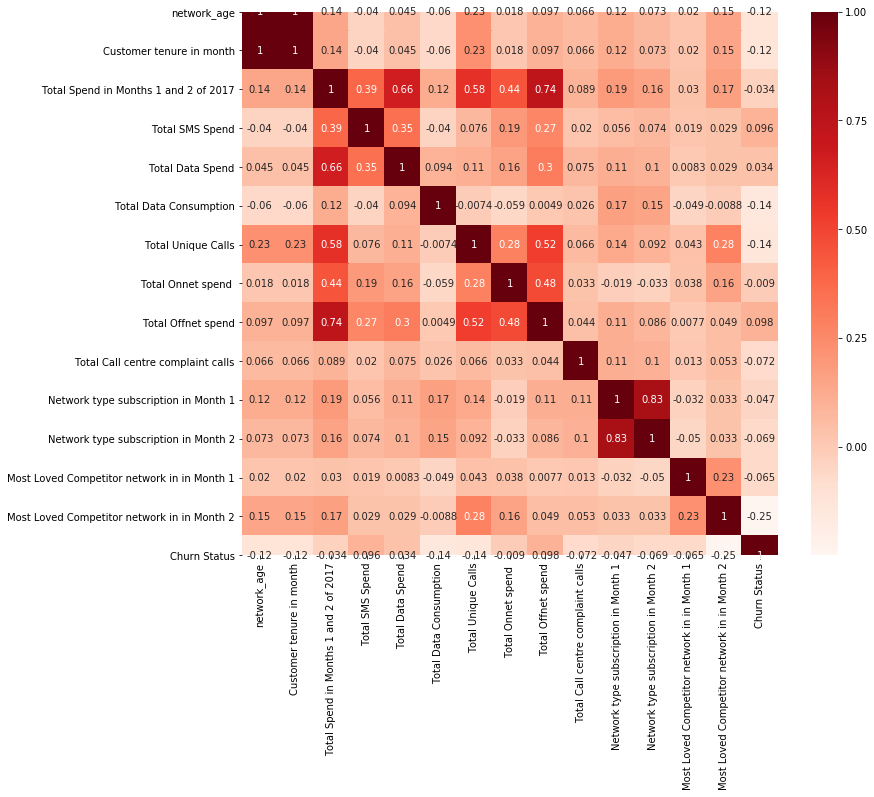

In [683]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [684]:
#Correlation with output variable
cor_target = abs(cor["Churn Status"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.09]
relevant_features

network_age                                    0.123000
Customer tenure in month                       0.122999
Total SMS Spend                                0.096018
Total Data Consumption                         0.142370
Total Unique Calls                             0.135427
Total Offnet spend                             0.098200
Most Loved Competitor network in in Month 2    0.249520
Churn Status                                   1.000000
Name: Churn Status, dtype: float64

### Drop uneeded featurs

In [742]:
dataset  = pd.read_csv('churn_train.csv')
#dataset = dataset.drop(dataset.iloc[:,8:9],1)
dataset = dataset.drop("Customer ID",1)
dataset = dataset.drop("Total Spend in Months 1 and 2 of 2017",1)
dataset = dataset.drop("Total Unique Calls",1)
dataset = dataset.drop("Total SMS Spend",1) 
dataset = dataset.drop("Customer tenure in month",1)
dataset = dataset.drop("Network type subscription in Month 2",1)
dataset = dataset.drop("Most Loved Competitor network in in Month 1",1)

features = dataset.iloc[:,:-1].values

goal = dataset.iloc[:,-1].values
# features = pd.DataFrame(features)
# features

### Data set after droping uneeded featurs to increase accurcay

In [743]:
dataset

,network_age,Total Data Spend,Total Data Consumption,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,117,38.75,6.941061e+03,0,1092,1,0,1,0
1,123,1.25,1.495100e+00,564,6408,2,1,1,0
2,1342,1.25,7.514600e+00,251,1004,2,2,1,0
3,1316,1.25,1.024400e+00,1626,4373,1,1,1,0
4,247,15.00,3.241738e+07,12,1145,2,0,1,0
...,...,...,...,...,...,...,...,...,...
1392,161,6.25,9.781816e+02,11700,67635,1,0,3,1
1393,1458,20.00,8.781532e+06,4104,77050,1,1,3,1
1394,345,140.00,4.695170e+07,168,33614,1,2,3,1
1395,1272,56.25,1.861878e+05,10087,88726,1,2,3,1


In [744]:
# solve the categorical data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
features[:,0] = encoder.fit_transform(features[:,0])

# standrize the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

# split into train and test
from sklearn.model_selection import train_test_split
train_set, test_set, goal_train, goal_test = train_test_split(features,goal,test_size =0.2,random_state=0)

In [745]:
train_set.shape, test_set.shape

((1117, 8), (280, 8))

In [746]:
#features=pd.DataFrame(features)
#features

## let's build our model

In [747]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 0)
logistic.fit(train_set, goal_train)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Well,, we need to evaluate that model !
## Let's use the confusion Matrix

In [748]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(goal_test, logistic.predict(test_set))
pd.DataFrame(cm)

,0,1
0,110,32
1,47,91


## let's get the accuracy

In [749]:
logistic.score(test_set, goal_test)

0.7178571428571429